In [1]:
%%html
<style>
    body {
        font-family: "Times New Roman", Times, serif; 
    }
</style>

## 1. Plot the data with a scatterplot. How many species must be there in the dataset? 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

filename = "CSD.csv"
df = pd.read_csv(filename)
df

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


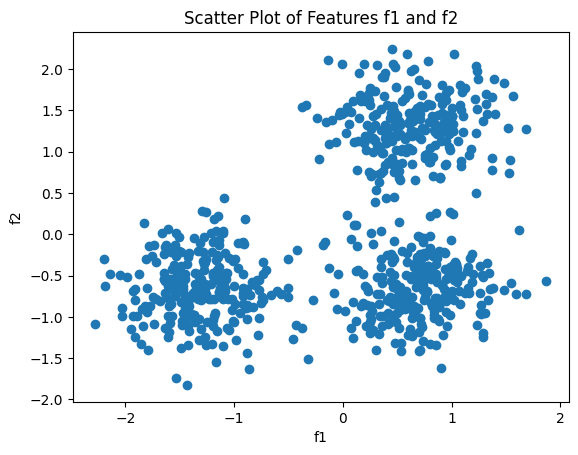

In [3]:
plt.scatter(df['f1'], df['f2'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Scatter Plot of Features f1 and f2')
plt.show()

According to the plot, 3 species must be there. 

## 2. Find the rough feature ranges to classify these species correctly. It might be a good idea to do this step visually from some data plots. 

- Species 1: Feature f1 in the range of [-2.5, -0.5], Feature f2 in the range of [-2.0, 0.5]
- Species 2: Feature f1 in the range of [-0.5, 2], Feaure f2 in the range of [-1.5, 0.5]
- Species 3: Feature f1 in the range of [-0.5, 1.7], Feaure f2 in the range of [0.5, 2.5]

label the datapoints

In [4]:
def label_species(row):
    f1, f2 = row['f1'], row['f2']
    if -2.5 <= f1 <= -0.5 and -2.0 <= f2 <= 0.5:
        return 1
    elif -0.5 <= f1 <= 2 and -1.5 <= f2 <= 0.5:
        return 2
    elif -0.5 <= f1 <= 1.7 and 0.5 <= f2 <= 2.5:
        return 3
    else:
        return 0 

new_df=df.copy()
new_df['Species'] = new_df.apply(label_species, axis=1)

# Remove points with label 0
new_df = new_df[new_df['Species'] != 0]
new_df


,f1,f2,Species
0,0.494261,1.451067,3
1,-1.428081,-0.837064,1
2,0.338559,1.038759,3
3,0.119001,-1.053976,2
4,1.122425,1.774937,3
...,...,...,...
745,0.505927,1.213927,3
746,-1.640461,-0.469973,1
747,-0.057139,-0.909261,2
748,-1.169394,0.039597,1


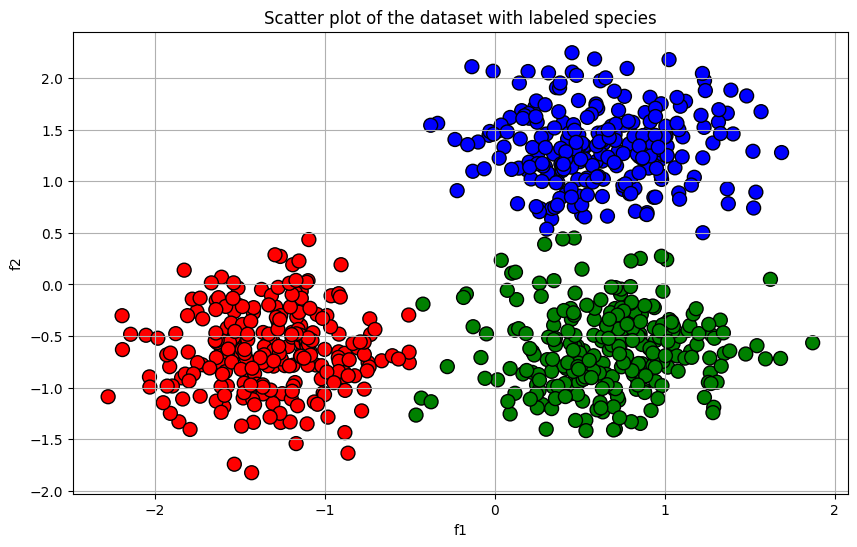

In [5]:
# Plotting the data
plt.figure(figsize=(10, 6))
colors = {1: 'red', 2: 'green', 3: 'blue'}
plt.scatter(new_df['f1'], new_df['f2'], c=new_df['Species'].apply(lambda x: colors[x]), edgecolor='k', s=100)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Scatter plot of the dataset with labeled species')
plt.grid(True)
plt.show()


## 3. Use K-means clustering to find anomalies. (Hint: find cluster data points that are far from the centroids.) 

In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

kmean_df=df.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(kmean_df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

centroids = kmeans.cluster_centers_

centroids

array([[ 0.62260555,  1.3172598 ],
       [-1.30266211, -0.65704205],
       [ 0.6954587 , -0.64442334]])

In [7]:
labels = kmeans.labels_
kmean_df['cluster']=labels
kmean_df

,f1,f2,cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0
...,...,...,...
745,0.505927,1.213927,0
746,-1.640461,-0.469973,1
747,-0.057139,-0.909261,2
748,-1.169394,0.039597,1


Calculate the distance of each points to three centroids respectively. Then choose the minimum distance from distance to three centroids

In [8]:
distances = cdist(df, centroids, 'euclidean')
min_distances = np.min(distances, axis=1)
min_distances

array([0.18540951, 0.21940309, 0.39780045, 0.70713256, 0.67770723,
       0.92983184, 0.10502589, 0.32444844, 0.62986127, 0.39228866,
       0.10337549, 0.40399294, 0.27958801, 0.45719432, 0.76954324,
       0.51256926, 1.17370935, 0.42464758, 0.87476019, 0.49477333,
       0.40051886, 0.1731254 , 0.26934416, 0.38776162, 0.11689666,
       0.43294925, 0.36609873, 0.43631093, 0.45186686, 0.45078755,
       0.18723863, 0.18342577, 0.87270731, 0.09518375, 0.38466864,
       0.41855823, 0.22840062, 0.483238  , 0.25157505, 1.02439684,
       0.39071106, 0.03010071, 0.17066437, 0.47665654, 0.88794074,
       0.29204847, 0.29748948, 0.40167179, 0.7590727 , 0.30577469,
       0.69897097, 0.15461768, 0.7889578 , 0.24655724, 0.36051255,
       0.05149834, 0.613433  , 0.8203088 , 0.47303566, 0.17081872,
       0.34294213, 0.4278324 , 0.27795948, 0.61093425, 0.19508053,
       0.4670403 , 0.41139805, 0.73414741, 0.59166622, 0.17785427,
       0.31032274, 0.32111108, 0.64472528, 0.28110546, 0.34411

Select anomalies that are in top 10% farthest from the centroid.

In [9]:
threshold = np.percentile(min_distances, 90)
anomalies = kmean_df[min_distances > threshold]
print(len(anomalies))
anomalies

75


,f1,f2,cluster
5,-1.261570,0.271881,1
16,-1.430208,-1.823801,1
18,-0.506014,-0.295715,1
32,-1.858047,-1.330218,1
39,-0.166999,-0.091653,2
...,...,...,...
721,1.681418,-0.716639,2
723,0.038270,0.234517,2
725,1.593021,-0.720685,2
730,0.306037,0.536316,0


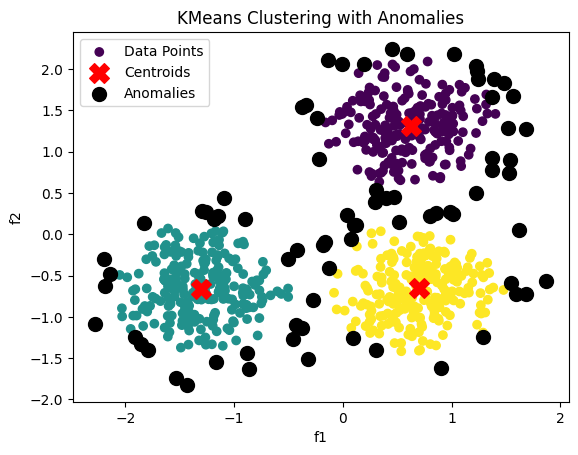

In [10]:
plt.scatter(kmean_df['f1'], kmean_df['f2'], c=kmean_df['cluster'], cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.scatter(anomalies['f1'], anomalies['f2'], c='black', marker='o', s=100, label='Anomalies')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('KMeans Clustering with Anomalies')
plt.legend()
plt.show()


## 4. Use DBSCAN clustering to find anomalies. To be clear, look for anomalies with DBSCAN in the full dataset; this is an alternative to Q3.’s method. 

In [11]:
from sklearn.cluster import DBSCAN
import pandas as pd

df_db=df.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_db)

dbscan = DBSCAN(eps=0.2)
df_db['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
df_db

,f1,f2,DBSCAN_Cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0
...,...,...,...
745,0.505927,1.213927,0
746,-1.640461,-0.469973,1
747,-0.057139,-0.909261,2
748,-1.169394,0.039597,1


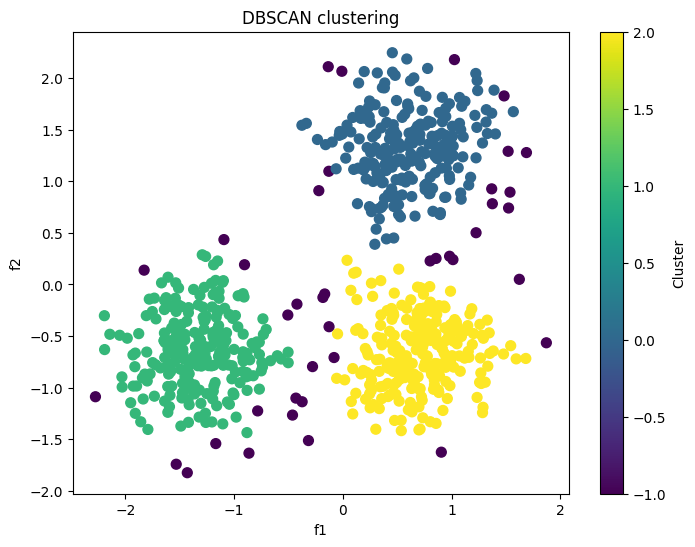

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df_db['f1'], df_db['f2'], c=df_db['DBSCAN_Cluster'], s=50, cmap='viridis')
plt.title('DBSCAN clustering')
plt.xlabel('f1')
plt.ylabel('f2')
plt.colorbar(label='Cluster')
plt.show()

## 5

Choose K-means result, remove the anomalies

In [13]:
cleaned_df = kmean_df.drop(anomalies.index)
cleaned_df

,f1,f2,cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0
...,...,...,...
745,0.505927,1.213927,0
746,-1.640461,-0.469973,1
747,-0.057139,-0.909261,2
748,-1.169394,0.039597,1


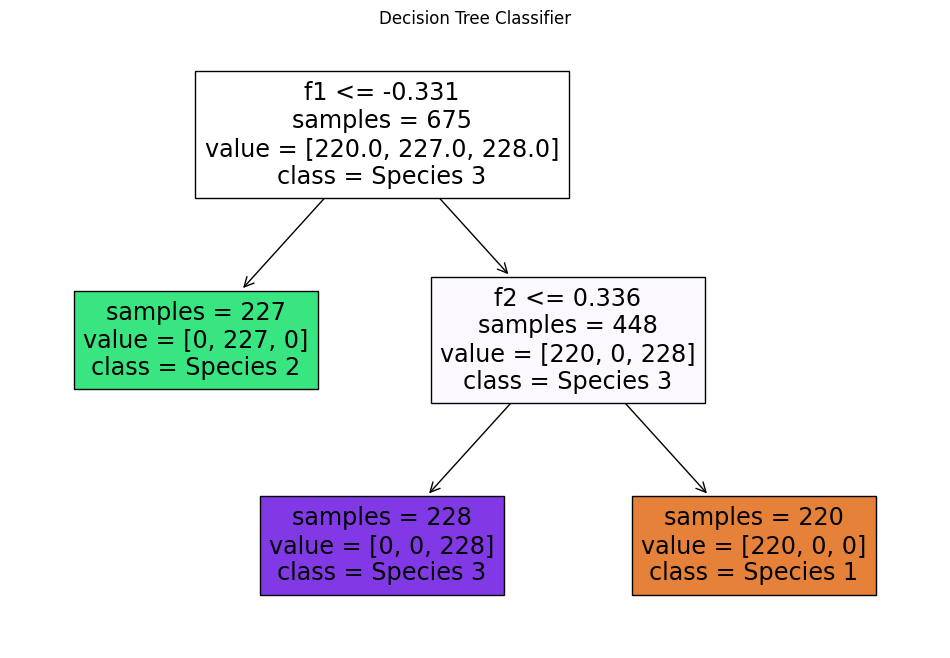

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = cleaned_df[['f1', 'f2']]
y = cleaned_df['cluster']


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['f1', 'f2'],impurity=False,class_names=['Species 1', 'Species 2','Species 3'])
plt.title('Decision Tree Classifier')
plt.show()


visualize clusters according to features

<Axes: xlabel='cluster', ylabel='f2'>

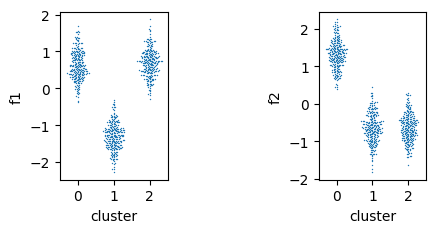

In [15]:
plt.subplot(2, 4, 1)
sns.swarmplot(x=kmean_df["cluster"], y=kmean_df["f1"], size=1)
plt.subplot(2, 4, 3)
sns.swarmplot(x=kmean_df["cluster"], y=kmean_df["f2"], size=1)

## 6. Show that, in fact, it helped to clean the outliers before generating the decision tree. (Hint: we’re looking for something more substantial than a 100% vs. 97% accuracy improvement.) 

Without cleaning the anomalies.

[1.         1.         1.         0.98666667 0.99333333]


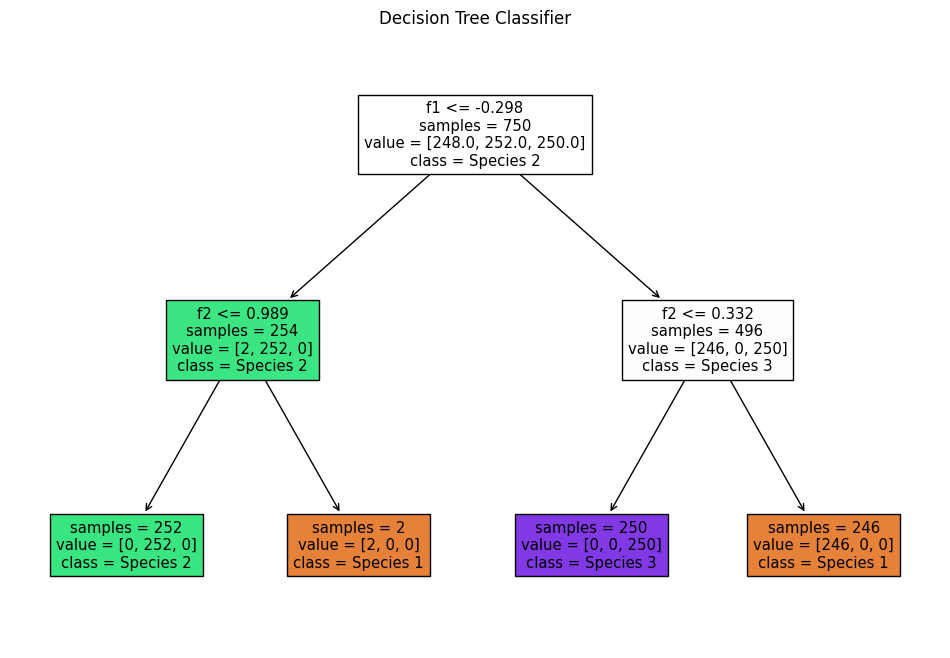

In [16]:
from sklearn.model_selection import cross_val_score, KFold
no_clean_df=kmean_df.copy()

X = no_clean_df[['f1', 'f2']]
y = no_clean_df['cluster']

kfold = KFold(n_splits=5)

tree = DecisionTreeClassifier(random_state=42)
scores=cross_val_score(tree, X, y, cv=kfold, scoring='accuracy')
print(scores)
tree.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=['f1', 'f2'],impurity=False,class_names=['Species 1', 'Species 2','Species 3'])
plt.title('Decision Tree Classifier')
plt.show()

There is a slight drop in accuracy in the later folds without cleaning the anomalies. If the data cleaning effectively removed outliers that were previously causing misclassifications or noise within the cluster assignments, the remaining data might be very well-defined and homogeneous within clusters, leading to high accuracy in classification.

In general, clean the data that are in the boundary help the algorithm to classify the data more accurately based on their distance towards centroids, which in turn improves the decision tree performance. Also, it makes the decision tree generalized and simpler, preventing overfitting.